<h1>Detail Analysis of Corona<h1>
    

In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [42]:
data = pd.read_csv('data/covid_19_clean_complete.csv')

In [43]:
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
16869,Sint Maarten,Netherlands,18.0425,-63.0548,3/20/20,1,0,0
16870,NaN,Niger,17.6078,8.0817,3/20/20,1,0,0
16871,NaN,Papua New Guinea,-6.3150,143.9555,3/20/20,1,0,0
16872,Isle of Man,United Kingdom,54.2361,-4.5481,3/20/20,1,0,0


In [44]:
data['Date'] = pd.to_datetime(data['Date'])

In [45]:
print("External Data")
print(f"Earliest Entry: {data['Date'].min()}")
print(f"Last Entry:     {data['Date'].max()}")
print(f"Total Days:     {(data['Date'].max()) - (data['Date'].min())}")

External Data
Earliest Entry: 2020-01-22 00:00:00
Last Entry:     2020-03-20 00:00:00
Total Days:     58 days 00:00:00


In [46]:
grouped = data.groupby('Date')['Date', 'Confirmed', 'Deaths'].sum().reset_index()

fig = px.line(grouped, x="Date", y="Confirmed", 
              title="Worldwide Confirmed Cases Over Time")
fig.show()

fig = px.line(grouped, x="Date", y="Confirmed", 
              title="Worldwide Confirmed Cases (Logarithmic Scale) Over Time", 
              log_y=True)
fig.show()

/home/sharayu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [47]:
data['Province/State'] = data['Province/State'].fillna('')
temp = data[[col for col in data.columns if col != 'Province/State']]
latest = temp[temp['Date'] == max(temp['Date'])].reset_index()
latest_grouped = latest.groupby('Country/Region')['Confirmed', 'Deaths'].sum().reset_index()

/home/sharayu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [48]:
latest_grouped

,Country/Region,Confirmed,Deaths
0,Afghanistan,24,0
1,Albania,70,2
2,Algeria,90,11
3,Andorra,75,0
4,Angola,1,0
...,...,...,...
157,Uzbekistan,33,0
158,Venezuela,42,0
159,Vietnam,91,0
160,Zambia,2,0


In [49]:
fig = px.choropleth(latest_grouped, locations="Country/Region", 
                    locationmode='country names', color="Confirmed", 
                    hover_name="Country/Region", range_color=[1,5000], 
                    color_continuous_scale="peach", 
                    title='Countries with Confirmed Cases')
# fig.update(layout_coloraxis_showscale=False)
fig.show()

In [50]:
cleaned_data = pd.read_csv('data/covid_19_clean_complete.csv', parse_dates=['Date'])
cleaned_data.head()
cleaned_data['Active'] = cleaned_data['Confirmed'] - cleaned_data['Deaths'] - cleaned_data['Recovered']

In [51]:
temp

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Thailand,15.0000,101.0000,2020-01-22,2,0,0
1,Japan,36.0000,138.0000,2020-01-22,2,0,0
2,Singapore,1.2833,103.8333,2020-01-22,0,0,0
3,Nepal,28.1667,84.2500,2020-01-22,0,0,0
4,Malaysia,2.5000,112.5000,2020-01-22,0,0,0
...,...,...,...,...,...,...,...
16869,Netherlands,18.0425,-63.0548,2020-03-20,1,0,0
16870,Niger,17.6078,8.0817,2020-03-20,1,0,0
16871,Papua New Guinea,-6.3150,143.9555,2020-03-20,1,0,0
16872,United Kingdom,54.2361,-4.5481,2020-03-20,1,0,0


In [53]:
# temp = cleaned_data.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
# temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Active'],
#                  var_name='case', value_name='count')


# fig = px.line(temp, x="Date", y="count", color='case',
#              title='Cases over time: Line Plot', color_discrete_sequence = ['cyan', 'red', 'orange'])
# fig.show()


# fig = px.area(temp, x="date", y="count", color='case',
#              title='Cases over time: Area Plot', color_discrete_sequence = ['cyan', 'red', 'orange'])
# fig.show()

In [54]:
formated_gdf = data.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)

/home/sharayu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [55]:
fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, 1500], 
                     projection="natural earth", animation_frame="Date", 
                     title='COVID-19: Spread Over Time', color_continuous_scale="portland")

In [56]:
fig.show()

<h1>Analysis of COVID in INDIA<h1>

In [57]:
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Deaths
0,1,Andhra Pradesh,3,0,0,0
1,2,Chattisgarh,1,0,0,0
2,3,Delhi,25,1,5,1
3,4,Gujarat,7,0,0,0
4,5,Haryana,3,14,0,0
5,6,Himachal Pradesh,2,0,0,0
6,7,Karnataka,15,0,1,1
7,8,Kerala,33,7,3,0
8,9,Madhya Pradesh,4,0,0,0
9,10,Maharashtra,60,3,0,1


<h2>Imported Data</h2>

In [59]:
df = pd.read_csv('/home/sharayu/Downloads/DATASETOFCORONA/Covid cases in India.csv')
India_coord = pd.read_csv('data/Indian Coordinates.csv')

In [61]:
grouped_india = data[data['Country/Region'] == "India"].reset_index()
grouped_india_date = grouped_india.groupby('Date')['Date', 'Confirmed', 'Deaths'].sum().reset_index()
fig = px.line(grouped_india_date, x="Date", y="Confirmed", 
              title=f"Confirmed Cases in India Over Time", 
              color_discrete_sequence=['#F61067'],
              height=500
             )
fig.show()

/home/sharayu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [64]:
colors = ['BLUE', 'RED']

indian = df['Total Confirmed cases (Indian National)'].sum()
foreign = df['Total Confirmed cases ( Foreign National )'].sum()
fig = go.Figure(data=[go.Pie(labels=['Indian','Foreign Nationals'],
                             values= [indian,foreign],hole =.3)])
                          

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2)))
fig.show()

In [65]:
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Deaths
0,1,Andhra Pradesh,3,0,0,0
1,2,Chattisgarh,1,0,0,0
2,3,Delhi,25,1,5,1
3,4,Gujarat,7,0,0,0
4,5,Haryana,3,14,0,0
5,6,Himachal Pradesh,2,0,0,0
6,7,Karnataka,15,0,1,1
7,8,Kerala,33,7,3,0
8,9,Madhya Pradesh,4,0,0,0
9,10,Maharashtra,60,3,0,1


In [66]:
India_coord = pd.read_csv('data/Indian Coordinates.csv')

In [67]:
India_coord

,Name of State / UT,Latitude,Longitude,Unnamed: 3
0,Andaman And Nicobar,11.667026,92.735983,NaN
1,Andhra Pradesh,14.750429,78.570026,NaN
2,Arunachal Pradesh,27.100399,93.616601,NaN
3,Assam,26.749981,94.216667,NaN
4,Bihar,25.785414,87.479973,NaN
5,Chandigarh,30.719997,76.780006,NaN
6,Chhattisgarh,22.090420,82.159987,NaN
7,Dadra And Nagar Haveli,20.266578,73.016618,NaN
8,Delhi,28.669993,77.230004,NaN
9,Goa,15.491997,73.818001,NaN


In [68]:
df_full = pd.merge(India_coord,df,on='Name of State / UT')

In [69]:
df_full

,Name of State / UT,Latitude,Longitude,Unnamed: 3,S. No.,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Deaths
0,Andhra Pradesh,14.750429,78.570026,NaN,1,3,0,0,0
1,Chandigarh,30.719997,76.780006,NaN,17,1,0,0,0
2,Delhi,28.669993,77.230004,NaN,3,25,1,5,1
3,Haryana,28.450006,77.019991,NaN,5,3,14,0,0
4,Jammu and Kashmir,33.450000,76.240000,NaN,18,4,0,0,0
5,Karnataka,12.570381,76.919997,NaN,7,15,0,1,1
6,Kerala,8.900373,76.569993,NaN,8,33,7,3,0
7,Maharashtra,19.250232,73.160175,NaN,10,60,3,0,1
8,Odisha,19.820430,85.900017,NaN,11,2,0,0,0
9,Pondicherry,11.934994,79.830000,NaN,12,1,0,0,0


/home/sharayu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



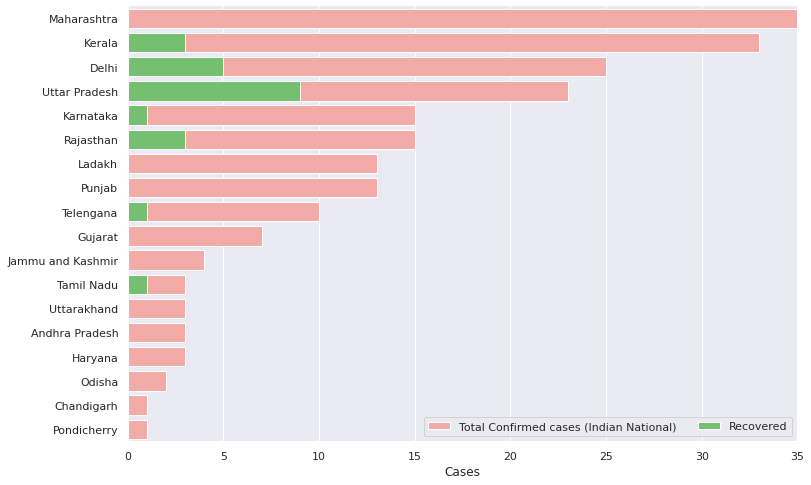

In [70]:
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total Confirmed cases (Indian National)','Cured/Discharged/Migrated','Deaths']]
data.sort_values('Total Confirmed cases (Indian National)',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total Confirmed cases (Indian National)", y="Name of State / UT", data=data,
            label="Total Confirmed cases (Indian National)", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured/Discharged/Migrated", y="Name of State / UT", data=data,
            label="Recovered", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",
       xlabel="Cases")
sns.despine(left=True, bottom=True)